In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
file_loc=(r"C:\Users\Dell\churn_pred\data1.csv")
data=pd.read_csv(file_loc, sep=';', decimal=',')

In [7]:
data.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
#replacing spaces in columns with "_"
data.columns=data.columns.str.replace(" ","_")

In [10]:
#change the categorical columns credit card info save and push status to binary classification
for i in data.select_dtypes(include=['object']).columns.values:
    data[i]=data[i].replace(["yes","no"],[1,0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   int64  
 4   push_status                          3333 non-null   int64  
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

In [12]:
data.location_code.value_counts()


415    1655
510     840
408     838
Name: location_code, dtype: int64

In [13]:
#location_code looks like a categorical column so we will use one hot encoding
one_hot=pd.get_dummies(data['location_code'],prefix="_")

In [14]:
one_hot

,__408,__415,__510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [15]:
del data["location_code"]
data=data.join(one_hot)

In [16]:
data.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [17]:
data.churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [18]:
# remember during modeling the data is skewed at around 85% towards non-churned customers

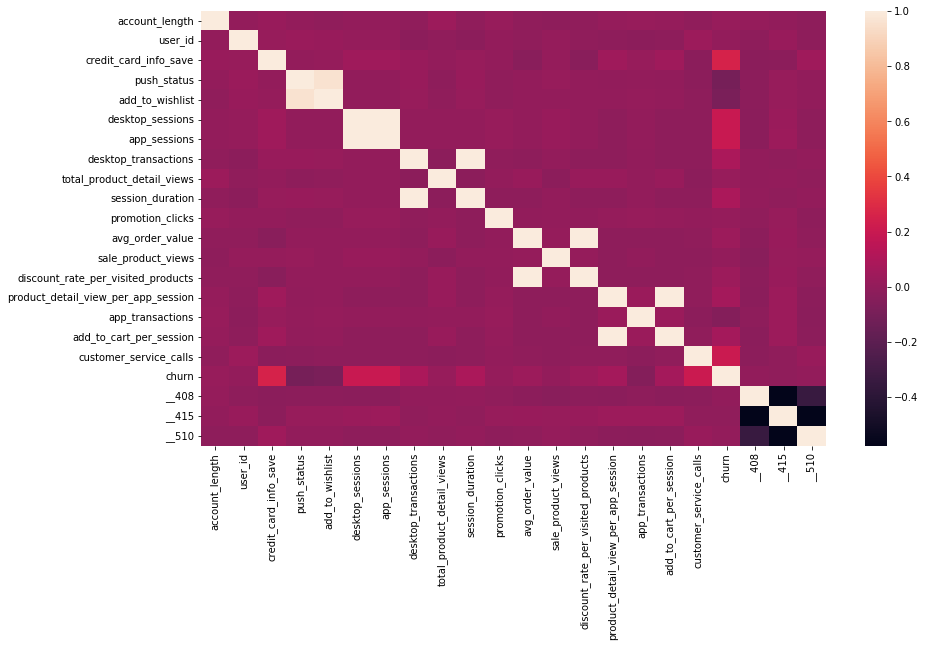

In [19]:
fig,ax=plt.subplots(figsize=(14,8))
sns.heatmap(data.corr())

In [20]:
#data distribution numeric columns
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions','app_sessions', 'desktop_transactions',
                   'total_product_detail_views','session_duration', 'promotion_clicks', 'avg_order_value','sale_product_views',
                   'discount_rate_per_visited_products','product_detail_view_per_app_session', 'app_transactions',
                   'add_to_cart_per_session', 'customer_service_calls']


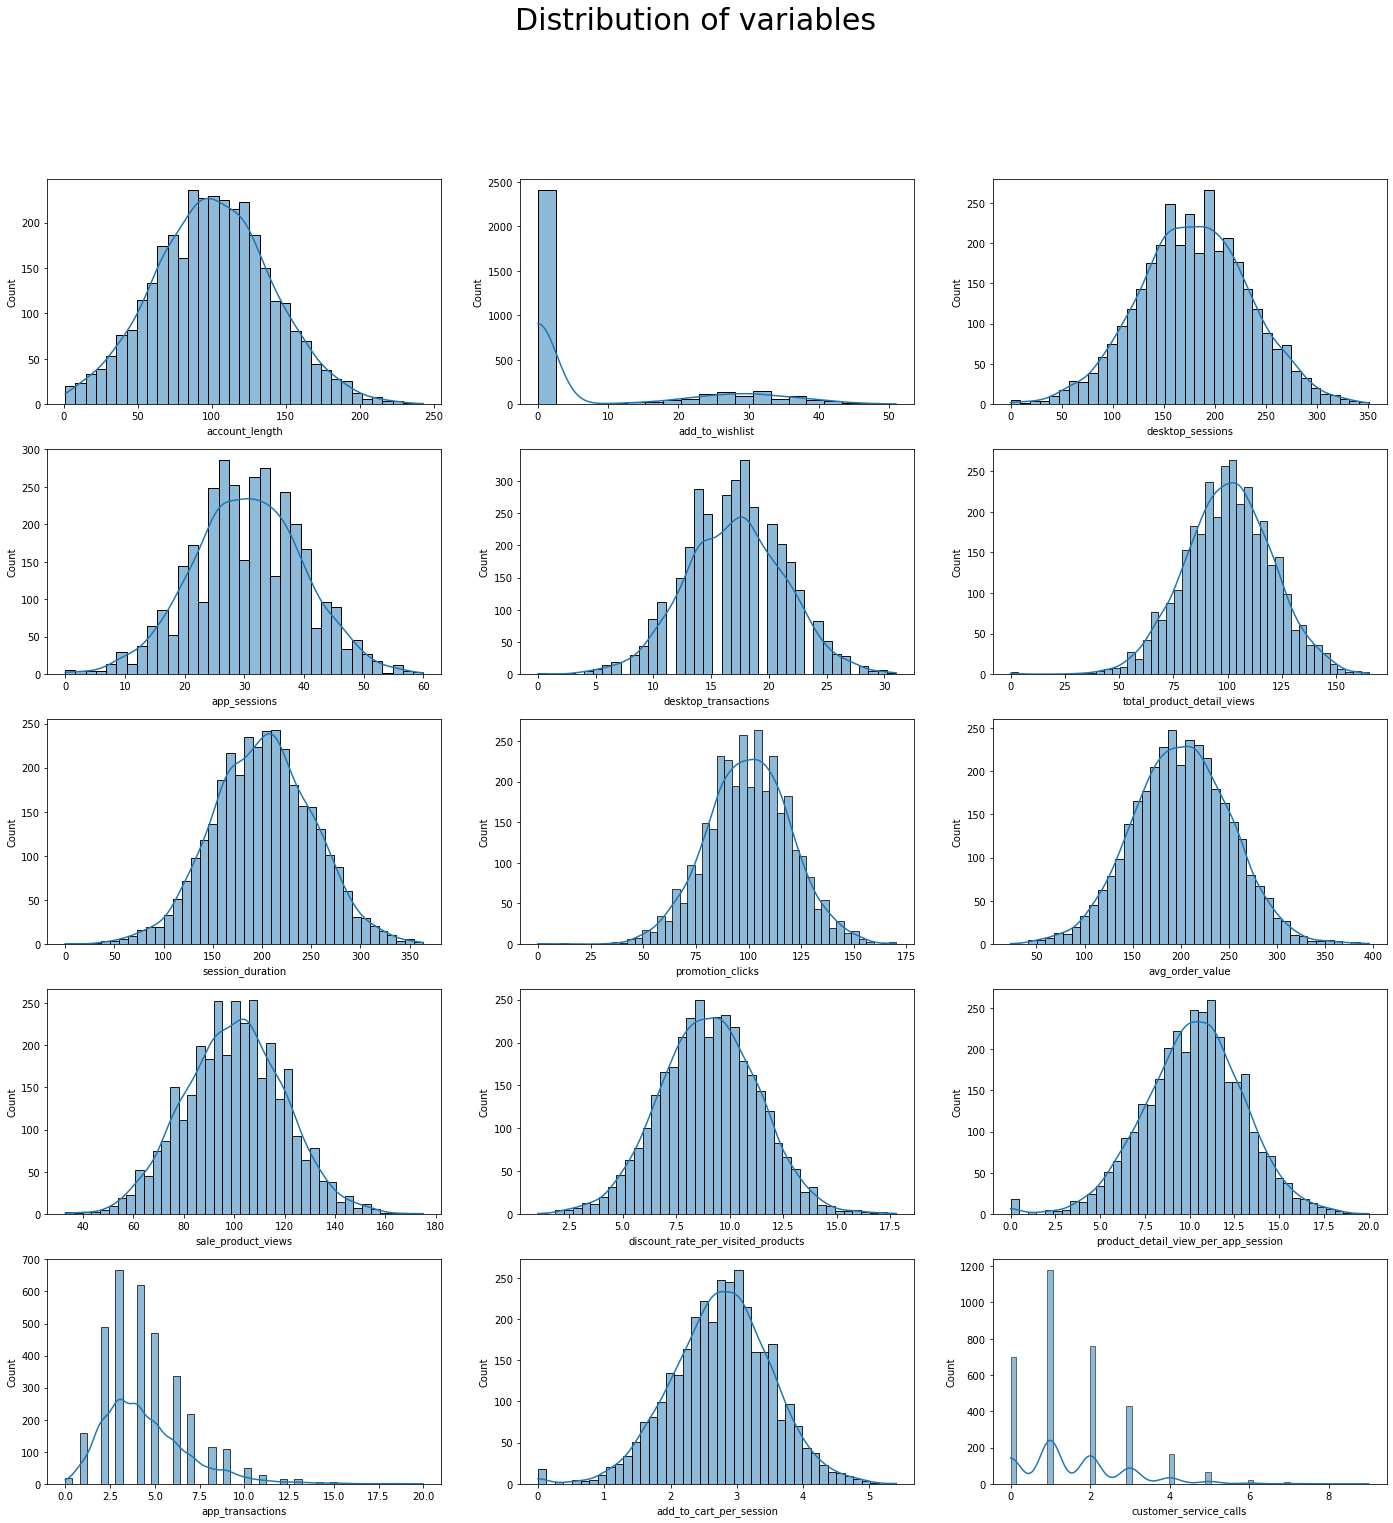

In [22]:
fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of variables",size=30)

for i in range(5):
    for j in range(3):
        sns.histplot(data[numeric_columns[3*i+j]],ax=axes[i,j],kde=True)
        


In [23]:
#dummies before scaling
data1=data.copy()

In [28]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [30]:
for column in [numeric_columns]:
    data[column]=mm.fit_transform(data[column])
    
    

In [31]:
data.drop(columns="user_id",inplace=True)


In [32]:
round(data.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,0.413,0.165,0.0,0.302,0.413,0.521,1.0
credit_card_info_save,3333.0,0.097,0.296,0.0,0.000,0.000,0.000,1.0
push_status,3333.0,0.277,0.447,0.0,0.000,0.000,1.000,1.0
add_to_wishlist,3333.0,0.159,0.268,0.0,0.000,0.000,0.392,1.0
desktop_sessions,3333.0,0.512,0.155,0.0,0.410,0.510,0.615,1.0
app_sessions,3333.0,0.509,0.154,0.0,0.400,0.517,0.617,1.0
desktop_transactions,3333.0,0.551,0.139,0.0,0.452,0.548,0.645,1.0
total_product_detail_views,3333.0,0.609,0.122,0.0,0.527,0.612,0.691,1.0
session_duration,3333.0,0.552,0.139,0.0,0.459,0.552,0.646,1.0
promotion_clicks,3333.0,0.589,0.117,0.0,0.512,0.588,0.671,1.0


In [34]:
output_file='customer_churndata_processed.csv'
data.to_csv(output_file,index=True)

In [35]:
data.head()

,account_length,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,...,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn,__408,__415,__510
0,0.524793,0,1,0.490196,0.754986,0.750000,0.548387,0.666667,0.541209,0.511765,...,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0,0,1,0
1,0.438017,0,1,0.509804,0.461538,0.450000,0.548387,0.745455,0.538462,0.605882,...,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0,0,1,0
2,0.561983,0,0,0.000000,0.692308,0.683333,0.322581,0.690909,0.332418,0.647059,...,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0,0,1,0
3,0.342975,1,0,0.000000,0.851852,0.850000,0.161290,0.430303,0.170330,0.517647,...,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0,1,0,0
4,0.305785,1,0,0.000000,0.475783,0.466667,0.419355,0.684848,0.406593,0.717647,...,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0,0,1,0


In [36]:
#splitting the data
X=data.drop(columns='churn')
X_features=X.columns.tolist()

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split=StratifiedShuffleSplit(n_splits=1,
                                        test_size=0.3,
                                        random_state=42)

In [38]:
train_idx, test_idx = next(strat_shuf_split.split(data[X_features], data.churn))

# Create the dataframes
X_train = data.loc[train_idx, X_features]
y_train = data.loc[train_idx, 'churn']

X_test  = data.loc[test_idx, X_features]
y_test  = data.loc[test_idx, 'churn']

In [39]:
y_train.value_counts(normalize=True)

0    0.855122
1    0.144878
Name: churn, dtype: float64

In [40]:
y_test.value_counts(normalize=True)

0    0.855
1    0.145
Name: churn, dtype: float64

In [41]:
#with the stratified split, we maintain the proportion of churned (15%) and not churned (85%) classes
#from the original dataset

from sklearn.linear_model import LogisticRegression

# Basic logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)



In [42]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [43]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


In [44]:
# Predicting the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [45]:
y_pred.apply(pd.Series.value_counts)
#predicted values from each model

,lr,l1,l2
0,959,939,932
1,41,61,68


In [46]:
y_prob.head()

,lr,l1,l2
0,0.834418,0.873835,0.866579
1,0.644187,0.672804,0.673812
2,0.957686,0.974300,0.982071
3,0.778044,0.760603,0.791894
4,0.875675,0.880040,0.869760


In [49]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [50]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [51]:
metrics

,lr,l1,l2
precision,0.836428,0.838037,0.850068
recall,0.864000,0.864000,0.871000
fscore,0.829877,0.839456,0.850462
accuracy,0.864000,0.864000,0.871000
auc,0.576850,0.605485,0.629623


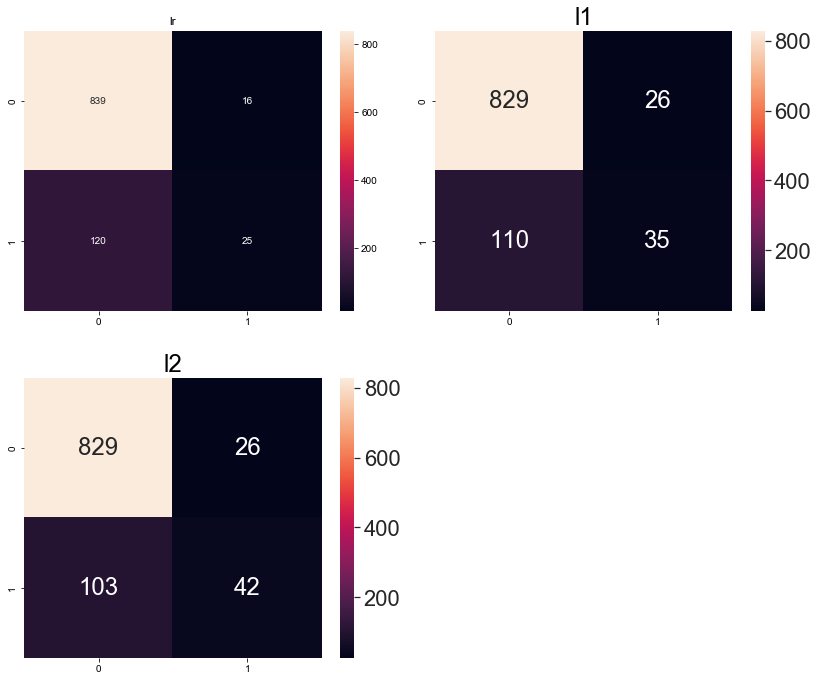

In [52]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    sns.set(font_scale=2);
    
plt.tight_layout()

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [54]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       855
           1       0.75      0.31      0.44       145

    accuracy                           0.89      1000
   macro avg       0.82      0.65      0.69      1000
weighted avg       0.87      0.89      0.86      1000

Accuracy score:  0.88
F1 Score:  0.44


Text(0.5, 74.5, 'Ground Truth')

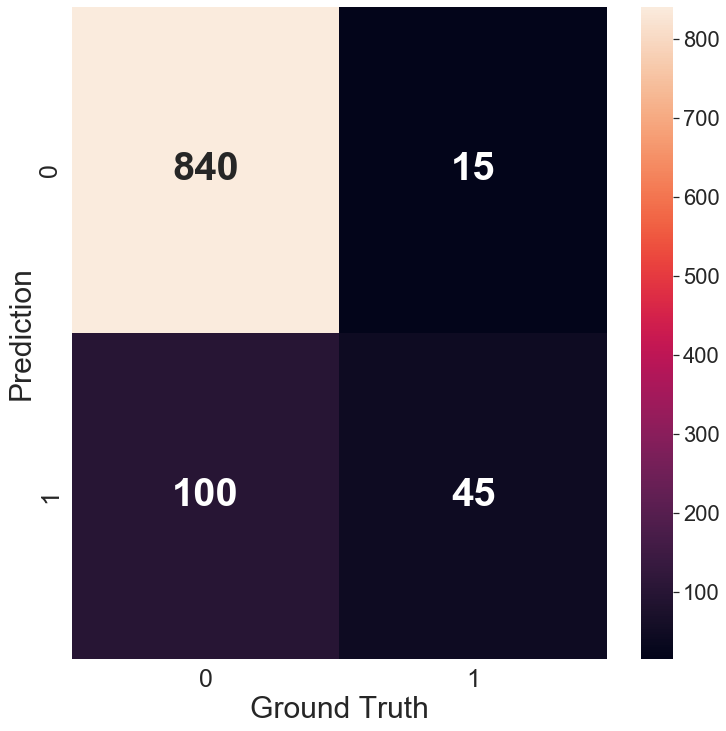

In [55]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [56]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])


Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

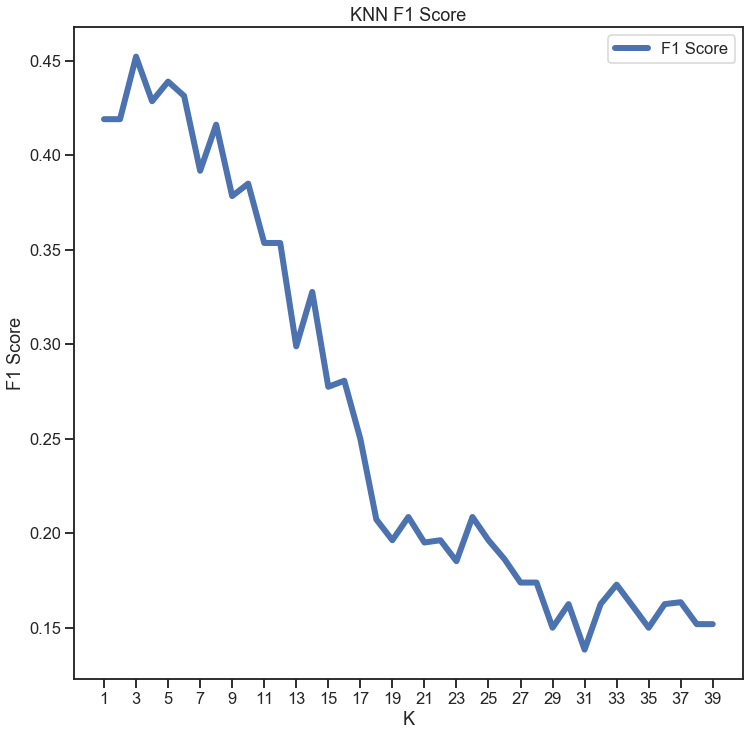

In [57]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

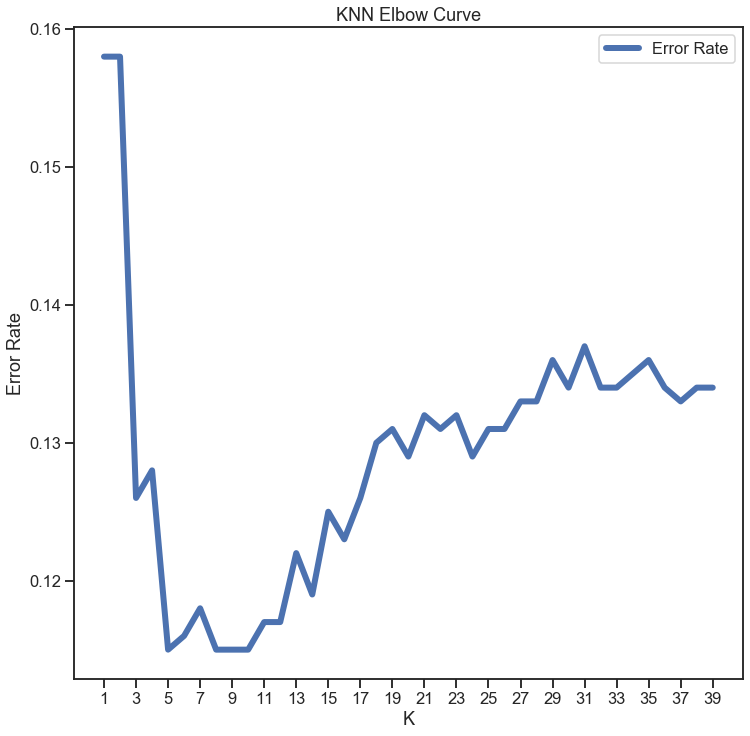

In [58]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200]
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4, 6]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [60]:
#best model
GV_GBC.best_estimator_.n_estimators

200

In [61]:
y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       875
           1       0.77      0.90      0.83       125

    accuracy                           0.95      1000
   macro avg       0.88      0.93      0.90      1000
weighted avg       0.96      0.95      0.96      1000



Text(0.5, 76.5, 'Ground Truth')

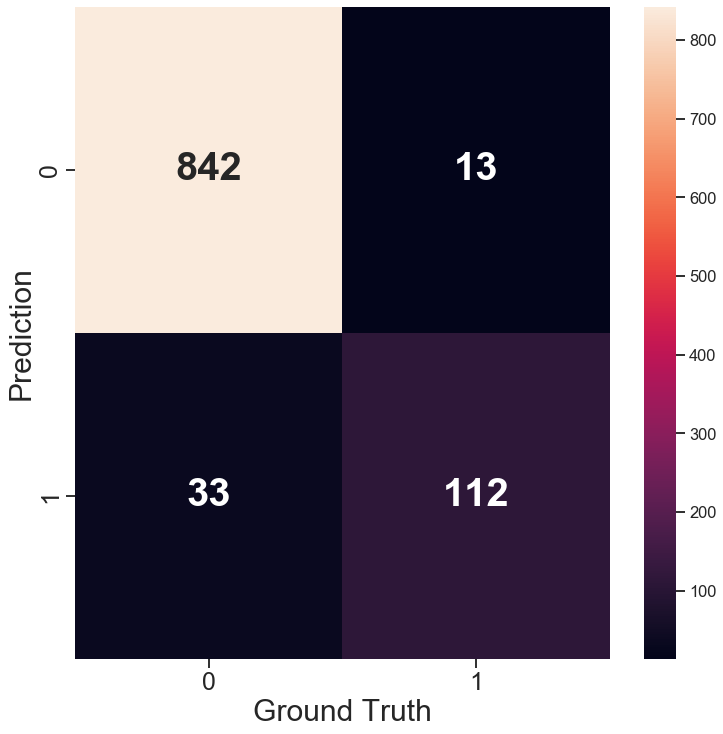

In [62]:
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)